# Create general W state



In [1]:
import qiskit
import numpy as np
import qtm.nqubit, qtm.custom_gate

In [2]:
random_sv = qiskit.quantum_info.random_statevector(8)

In [26]:
qc = qiskit.QuantumCircuit(3)
qc.initialize(random_sv.data, [0, 1, 2])
qc = qtm.nqubit.create_Wchainchecker_haar(qc, thetas, num_layers)
# qc.draw('mpl')
state = (qiskit.quantum_info.Statevector.from_instruction(qc))
qiskit.quantum_info.purity(state)

1.0

In [27]:

num_layers = 1
num_qubits = 3
thetas = np.ones(num_layers*num_qubits*4)
qc = qiskit.QuantumCircuit(num_qubits)
qc.initialize(random_sv.data, [0, 1, 2])

loss_values = []
thetass = []

for i in range(0, 200):
    if i % 2 == 0:
        print('W_chain: (' + str(num_layers) + ',' + str(num_qubits) + '): ' + str(i))
    grad_loss = qtm.base.grad_loss(
        qc, 
        qtm.nqubit.create_Wchainchecker_haar,
        thetas, r = 1/2, s = np.pi/2, num_layers = num_layers)
    print(grad_loss)
    thetas -= qtm.constant.learning_rate*(grad_loss) 
    thetass.append(thetas.copy())
    qc_copy = qtm.nqubit.create_Wchainchecker_haar(qc.copy(), thetas, num_layers)  
    loss = qtm.base.loss_basis(qtm.base.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values.append(loss)

W_chain: (1,3): 0
[ 0.04335  0.02645  0.01295 -0.04405 -0.0601   0.01255  0.01165  0.039
 -0.0965  -0.00075 -0.0015   0.0008 ]
[ 0.0426   0.02395  0.0132  -0.04135 -0.0618   0.0114   0.01455  0.0392
 -0.0987   0.0002   0.0009   0.00265]
W_chain: (1,3): 2
[ 0.04485  0.02395  0.01445 -0.04435 -0.06375  0.00985  0.01545  0.04555
 -0.10255  0.0008   0.0023   0.00085]
[ 0.04575  0.0237   0.01865 -0.0445  -0.0645   0.0088   0.01285  0.04545
 -0.10495 -0.00115 -0.00105 -0.00215]
W_chain: (1,3): 4
[ 0.0472   0.02785  0.0164  -0.049   -0.0625   0.0082   0.0151   0.04595
 -0.10915 -0.00115 -0.0016  -0.0016 ]
[ 0.0535   0.02275  0.0189  -0.0493  -0.0601   0.0085   0.017    0.04555
 -0.11145 -0.0013  -0.00155  0.00105]
W_chain: (1,3): 6
[ 0.0522   0.0243   0.0192  -0.05    -0.0679   0.00485  0.01405  0.05375
 -0.11275 -0.0012   0.00335 -0.00105]
[ 0.05305  0.0289   0.0192  -0.05535 -0.0613   0.00475  0.01505  0.048
 -0.11505 -0.0014  -0.00175  0.0033 ]
W_chain: (1,3): 8
[ 0.05395  0.03065  0.0199 

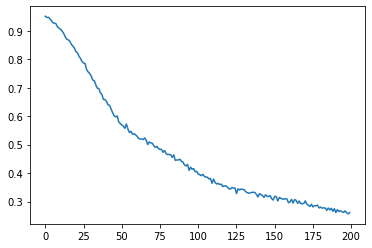

In [28]:
from matplotlib import pyplot as plt
plt.plot(loss_values)